### Import Dependencies-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Loading dataset-
df = pd.read_csv('Megastore_Management_System.csv')

In [3]:
# Data Exploration-
df.head()

,Order_Id,Order_Date,Ship_Date,Customer_Name,Customer_Id,Customer_Segment,Product_Id,Product_Name,Category,Region,...,Sales_Amount,Cost_Price,Profit,Payment_Mode,Delivery_Status,Supplier_Name,Supplier_Email,Stock_left,Auto_recorder,Recorder_Quantity
0,ord10001,25-09-2024,30-09-2024,Christian Anthony,cust8604,Home Office,prod961,mouse,electronics,North,...,28154.25,20320.13,7834.12,Creditcard,Returned,"Marshall, Washington and Dominguez",jason71@gilbert.com,36,No,0
1,ord10002,23-06-2025,29-06-2025,Rachel Whitaker,cust4608,Home Office,prod539,study table,furniture,North,...,6478.50,4110.49,2368.01,UPI,Returned,Parker Inc,bridget77@schwartz-harper.com,87,No,0
2,ord10003,21-09-2024,22-09-2024,James Rodriguez,cust2450,Corporate,prod912,biscuits,grocery,South,...,44089.50,34360.64,9728.86,Cash,Pending,Boyd LLC,scontreras@holland.org,26,No,0
3,ord10004,27-07-2024,29-07-2024,Michael Johnson,cust6585,Home Office,prod171,notebook,office supply,South,...,6908.40,5518.08,1390.32,Creditcard,Pending,"Hunter, Ashley and Russell",fphillips@ingram.com,25,No,0
4,ord10005,09-11-2024,14-11-2024,Sabrina Chang,cust4740,Home Office,prod957,biscuits,grocery,East,...,59988.00,45124.81,14863.19,Creditcard,Delivered,Lee-Johnson,richard79@mejia.com,1,Yes,88


In [4]:
df.dtypes

Order_Id                 str
Order_Date               str
Ship_Date                str
Customer_Name            str
Customer_Id              str
Customer_Segment         str
Product_Id               str
Product_Name             str
Category                 str
Region                   str
State                    str
City                     str
Quantity               int64
Unit_Price             int64
Discount (%)           int64
Sales_Amount         float64
Cost_Price           float64
Profit               float64
Payment_Mode             str
Delivery_Status          str
Supplier_Name            str
Supplier_Email           str
Stock_left             int64
Auto_recorder            str
Recorder_Quantity      int64
dtype: object

In [5]:
df.columns

Index(['Order_Id', 'Order_Date', 'Ship_Date', 'Customer_Name', 'Customer_Id',
       'Customer_Segment', 'Product_Id', 'Product_Name', 'Category', 'Region',
       'State', 'City', 'Quantity', 'Unit_Price', 'Discount (%)',
       'Sales_Amount', 'Cost_Price', 'Profit', 'Payment_Mode',
       'Delivery_Status', 'Supplier_Name', 'Supplier_Email', 'Stock_left',
       'Auto_recorder', 'Recorder_Quantity'],
      dtype='str')

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Id           10001 non-null  str    
 1   Order_Date         10001 non-null  str    
 2   Ship_Date          10001 non-null  str    
 3   Customer_Name      10001 non-null  str    
 4   Customer_Id        10001 non-null  str    
 5   Customer_Segment   10001 non-null  str    
 6   Product_Id         10001 non-null  str    
 7   Product_Name       10001 non-null  str    
 8   Category           10001 non-null  str    
 9   Region             10001 non-null  str    
 10  State              10001 non-null  str    
 11  City               10001 non-null  str    
 12  Quantity           10001 non-null  int64  
 13  Unit_Price         10001 non-null  int64  
 14  Discount (%)       10001 non-null  int64  
 15  Sales_Amount       10001 non-null  float64
 16  Cost_Price         10001 non-null

In [7]:
df.describe()

,Quantity,Unit_Price,Discount (%),Sales_Amount,Cost_Price,Profit,Stock_left,Recorder_Quantity
count,10001.000000,10001.00000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,5.563344,5060.90281,12.015298,24769.328847,18574.133285,6195.195562,49.778522,12.914209
std,2.863671,2844.21096,9.286047,20396.705112,15582.297770,5791.843992,29.124842,27.435048
min,1.000000,100.00000,0.000000,96.750000,66.660000,13.080000,0.000000,0.000000
25%,3.000000,2624.00000,5.000000,7743.000000,5771.740000,1789.670000,24.000000,0.000000
50%,6.000000,5049.00000,10.000000,19126.800000,14317.670000,4398.350000,50.000000,0.000000
75%,8.000000,7530.00000,20.000000,37274.400000,27656.070000,8773.180000,75.000000,0.000000
max,10.000000,10000.00000,25.000000,99680.000000,87692.340000,35402.820000,100.000000,100.000000


In [8]:
df.shape

(10001, 25)

In [9]:
print(f'Data Quality Check-')

# Check duplicates-
df.duplicated().sum()
print(f'Duplicate Rows: {df.duplicated().sum()}')

# Check null values-
print(f'Missing values:')
missing_value = df.isnull().sum()
print(missing_value[missing_value>0])


Data Quality Check-
Duplicate Rows: 0
Missing values:
Series([], dtype: int64)


### Datatype Conversion

In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format='%d-%m-%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'],format='%d-%m-%Y')

print(f'Order_Date dtypes: {df['Order_Date'].dtypes}')
print(f'Ship_Date dtypes: {df['Ship_Date'].dtypes}')

Order_Date dtypes: datetime64[us]
Ship_Date dtypes: datetime64[us]


## Analysis-

### Univariate Analysis-

----Categorical Variables----
Category
electronics      2545
grocery          2537
furniture        2506
office supply    2413
Name: count, dtype: int64


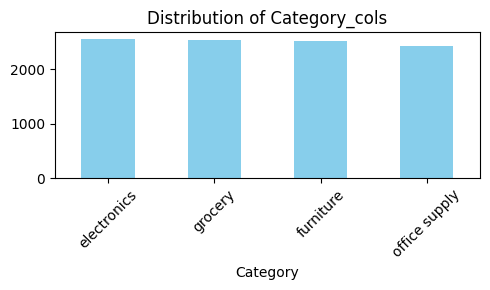

Customer_Segment
Consumer       3371
Corporate      3330
Home Office    3300
Name: count, dtype: int64


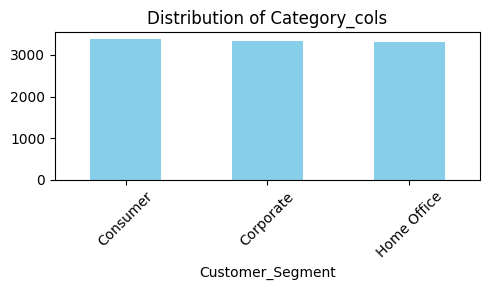

Region
East     2557
North    2528
South    2514
West     2402
Name: count, dtype: int64


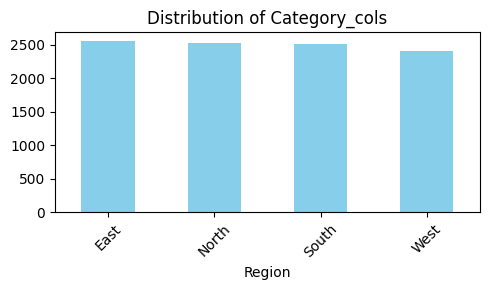

Payment_Mode
UPI           2612
Cash          2492
Creditcard    2455
Netbanking    2442
Name: count, dtype: int64


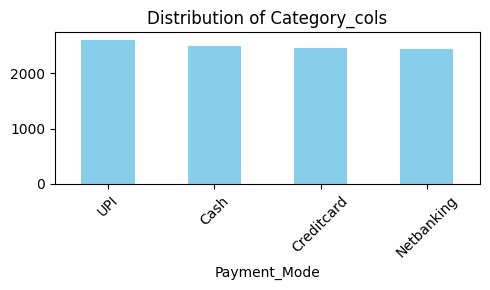

Auto_recorder
No     8000
Yes    2001
Name: count, dtype: int64


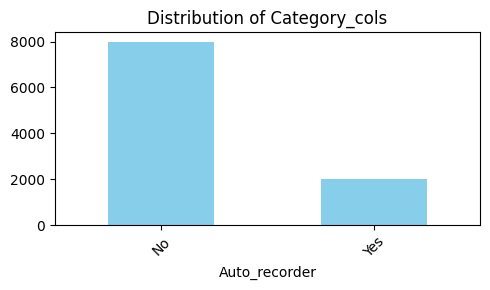

Delivery_Status
Cancelled    2569
Delivered    2530
Returned     2471
Pending      2431
Name: count, dtype: int64


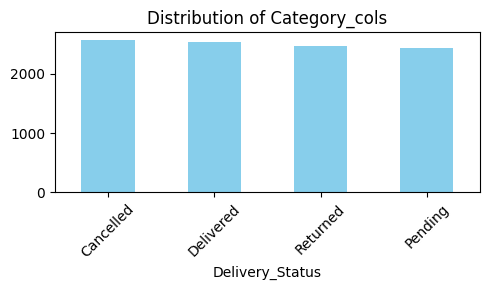

In [11]:
print('----Categorical Variables----')

categorical_cols = ['Category','Customer_Segment','Region','Payment_Mode','Auto_recorder','Delivery_Status']
for col in categorical_cols:
    print(df[col].value_counts())

    # Visualization-
    plt.figure(figsize=(5,3))
    plt.title('Distribution of Category_cols' )
    df[col].value_counts().plot(kind='bar',color='skyblue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Numerical Variables-

--- Numeric Variables---

Quantity

Mean : 5.56
Median : 6.00
Std : 2.86
Max : 10.00


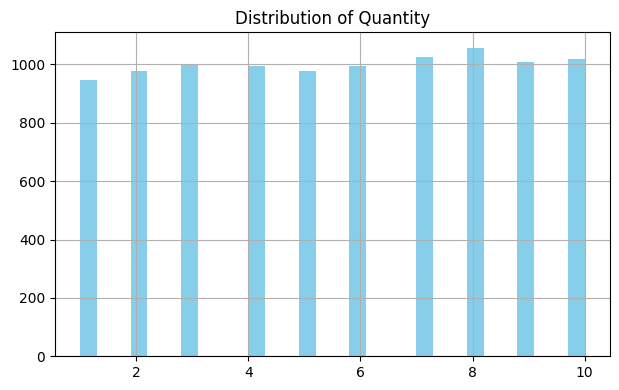


Unit_Price

Mean : 5060.90
Median : 5049.00
Std : 2844.21
Max : 10000.00


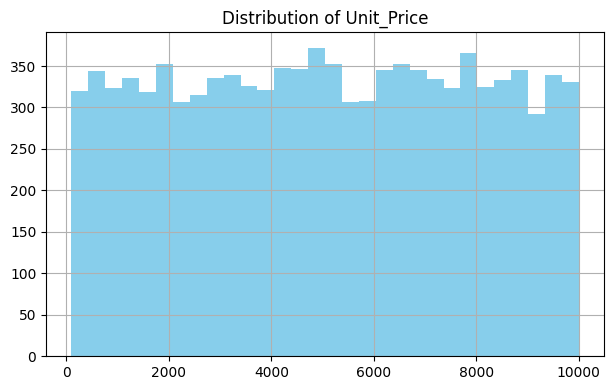


Discount (%)

Mean : 12.02
Median : 10.00
Std : 9.29
Max : 25.00


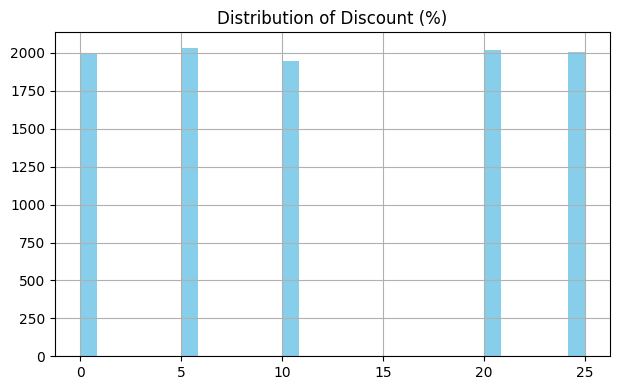


Sales_Amount

Mean : 24769.33
Median : 19126.80
Std : 20396.71
Max : 99680.00


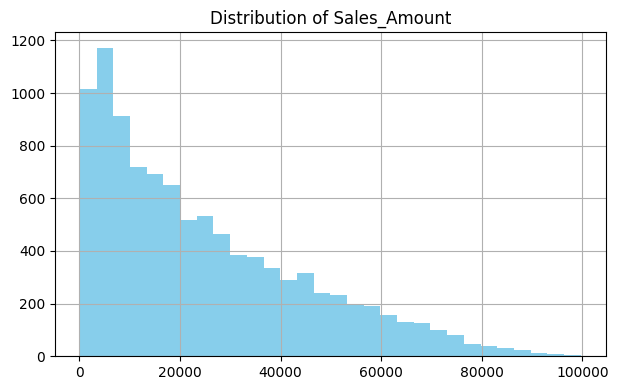


Cost_Price

Mean : 18574.13
Median : 14317.67
Std : 15582.30
Max : 87692.34


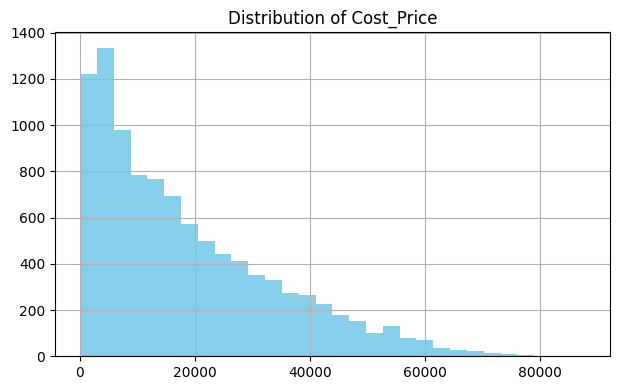


Profit

Mean : 6195.20
Median : 4398.35
Std : 5791.84
Max : 35402.82


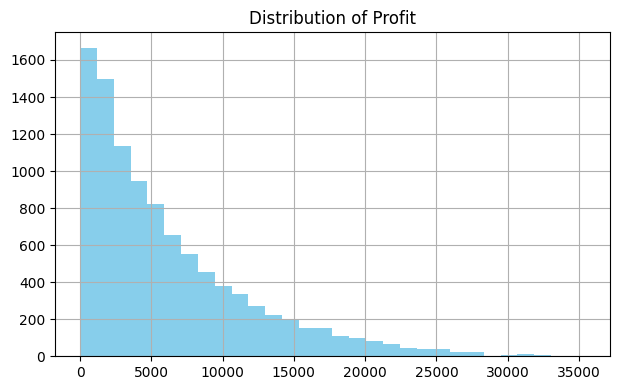


Stock_left

Mean : 49.78
Median : 50.00
Std : 29.12
Max : 100.00


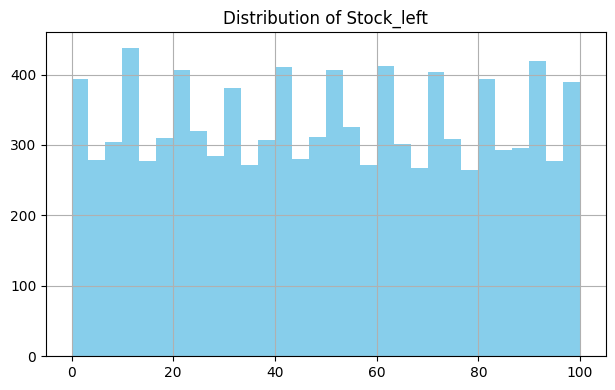


Recorder_Quantity

Mean : 12.91
Median : 0.00
Std : 27.44
Max : 100.00


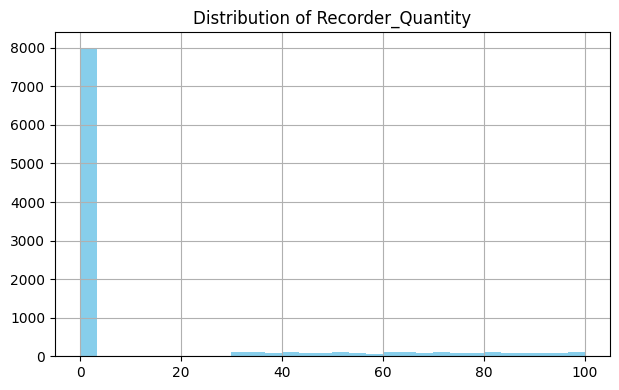

In [12]:
print('--- Numeric Variables---')

numeric_cols = ['Quantity','Unit_Price','Discount (%)','Sales_Amount','Cost_Price','Profit','Stock_left','Recorder_Quantity']
for col in numeric_cols:
    print(f'\n{col}\n')
    print(f'Mean : {df[col].mean():.2f}')
    print(f'Median : {df[col].median():.2f}')
    print(f'Std : {df[col].std():.2f}')
    print(f'Max : {df[col].max():.2f}')

    # Visualizations-
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=30, color= 'skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

### Bivariate Analysis-

Sales and profit by category :

               Sales_Amount       Profit  Order_Count  Profit_margin
Category                                                            
electronics     63558810.20  16004201.53         2545      25.180147
furniture       62695421.75  15706779.49         2506      25.052514
grocery         63147076.45  15559744.67         2537      24.640483
office supply   58316749.40  14687425.13         2413      25.185603


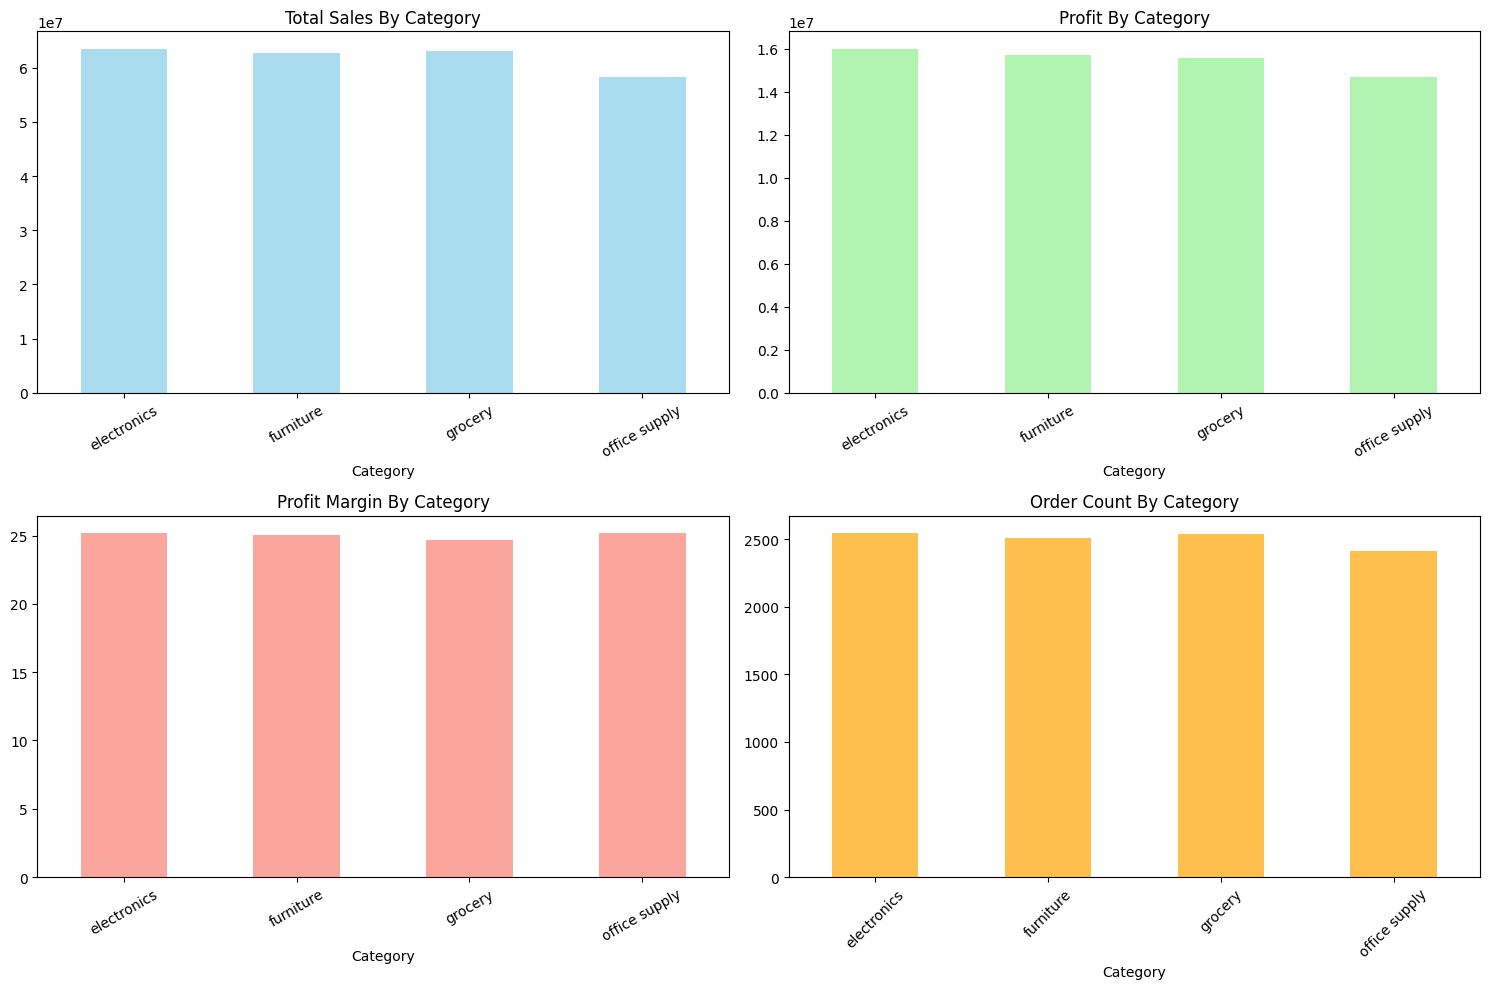

In [42]:
# Bivariate analysis is statistical analysis using two variables at same time. Purpose identify the relation between them
print(f'Sales and profit by category :\n')
category_performance = df.groupby('Category').agg({'Sales_Amount' : 'sum','Profit' : 'sum', 'Order_Id' : 'count'}).rename(columns={'Order_Id' : 'Order_Count'})
category_performance['Profit_margin'] = (category_performance['Profit']/ category_performance['Sales_Amount'])*100
print(category_performance)

# Visualizations-
fig, axes= plt.subplots(2,2,figsize=(15,10))

# Sales by Category-
category_performance['Sales_Amount'].plot(kind='bar',ax=axes[0,0],alpha=0.7,color='skyblue')
ax=axes[0,0].set_title('Total Sales By Category')
ax=axes[0,0].tick_params(axis='x',rotation=30)

# Profit by Category-
category_performance['Profit'].plot(kind='bar',ax=axes[0,1],alpha=0.7,color='lightgreen')
ax=axes[0,1].set_title('Profit By Category')
ax=axes[0,1].tick_params(axis='x',rotation=30)

# Profit by Margin-
category_performance['Profit_margin'].plot(kind='bar',ax=axes[1,0],alpha=0.7,color='salmon')
ax=axes[1,0].set_title('Profit Margin By Category')
ax=axes[1,0].tick_params(axis='x',rotation=30)    
        
# Order Count 
category_performance['Order_Count'].plot(kind='bar',ax=axes[1,1],alpha=0.7,color='orange')
ax=axes[1,1].set_title('Order Count By Category')
ax=axes[1,1].tick_params(axis='x',rotation=45) 

plt.tight_layout()
plt.show()

### Regional Performance

Reginal Performance 

        Sales_Amount       Profit  Order_Count  Profit_margin
Region                                                       
East      62717424.4  15806233.92         2557      25.202301
North     62311645.7  15528666.02         2528      24.920969
South     62741806.2  15622443.47         2514      24.899576
West      59947181.5  15000807.41         2402      25.023374


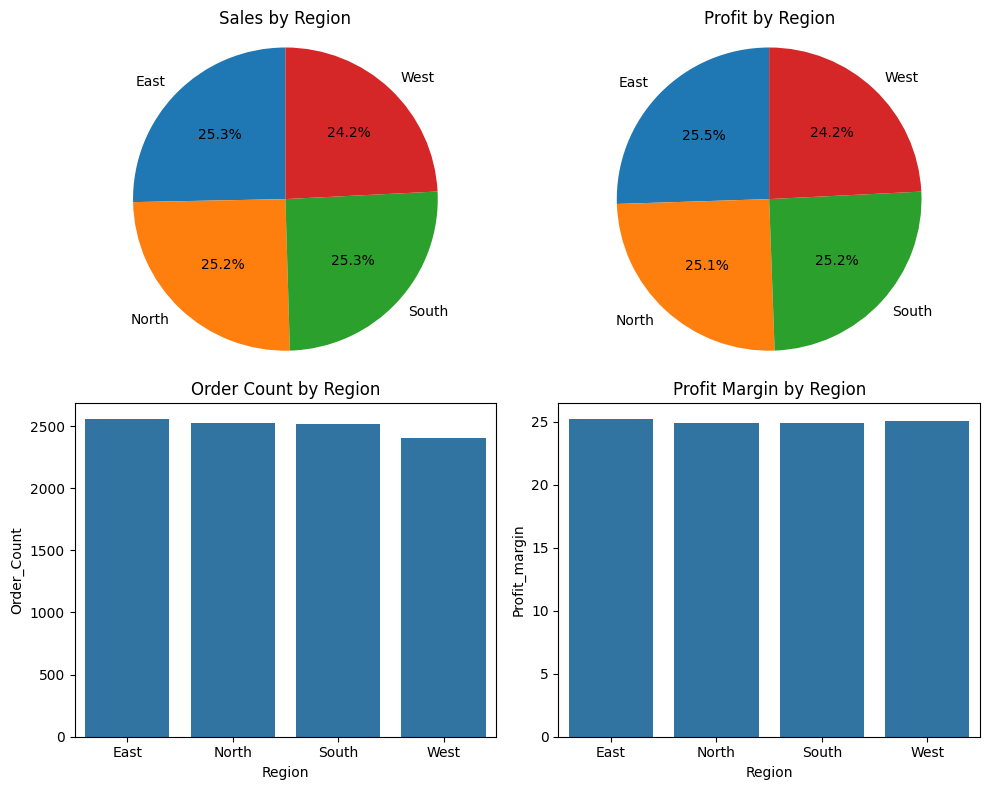

In [70]:
print(f'Reginal Performance \n')
region_performance = df.groupby('Region').agg({'Sales_Amount' : 'sum','Profit' : 'sum', 'Order_Id' : 'count'}).rename(columns={'Order_Id' : 'Order_Count'}) 
region_performance['Profit_margin'] = (region_performance['Profit']/ region_performance['Sales_Amount'])*100 
print(region_performance)

fig, axes = plt.subplots(2, 2, figsize=(10,8))

# 1️⃣ Sales Pie
region_performance['Sales_Amount'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[0,0]
)
axes[0,0].set_title('Sales by Region')
axes[0,0].set_ylabel('')
axes[0,0].axis('equal')

# 2️⃣ Profit Pie
region_performance['Profit'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[0,1]
)
axes[0,1].set_title('Profit by Region')
axes[0,1].set_ylabel('')
axes[0,1].axis('equal')

# 3️⃣ Order Count Bar
sns.barplot(
    x=region_performance.index,
    y=region_performance['Order_Count'],
    ax=axes[1,0]
)
axes[1,0].set_title('Order Count by Region')

# 4️⃣ Profit Margin Bar
sns.barplot(
    x=region_performance.index,
    y=region_performance['Profit_margin'],
    ax=axes[1,1]
)
axes[1,1].set_title('Profit Margin by Region')

plt.tight_layout()
plt.show()


### Time Series Analysis-

Time Series Analysis 

             Sales_Amount      Profit  Order_Count
Order_Month                                       
2024-02        6631688.80  1662977.65          275
2024-03        9753808.00  2389818.32          409
2024-04       10447281.55  2469975.71          412
2024-05        8593135.40  2224927.80          382
2024-06       10143233.80  2532309.57          418
2024-07       11284917.65  2844227.49          465
2024-08       10628037.20  2652473.56          430
2024-09       11386879.05  2880022.58          449
2024-10       11034857.25  2782278.11          425
2024-11       10645870.45  2693233.83          415
2024-12        9891470.90  2560239.69          410
2025-01        9289609.30  2353644.04          393
2025-02        8615058.05  2169621.57          369
2025-03       10670467.50  2680075.72          425
2025-04        9952955.95  2416468.00          392
2025-05       11415423.10  2853006.93          451
2025-06       10690013.40  2713891.55          426
2025-07 

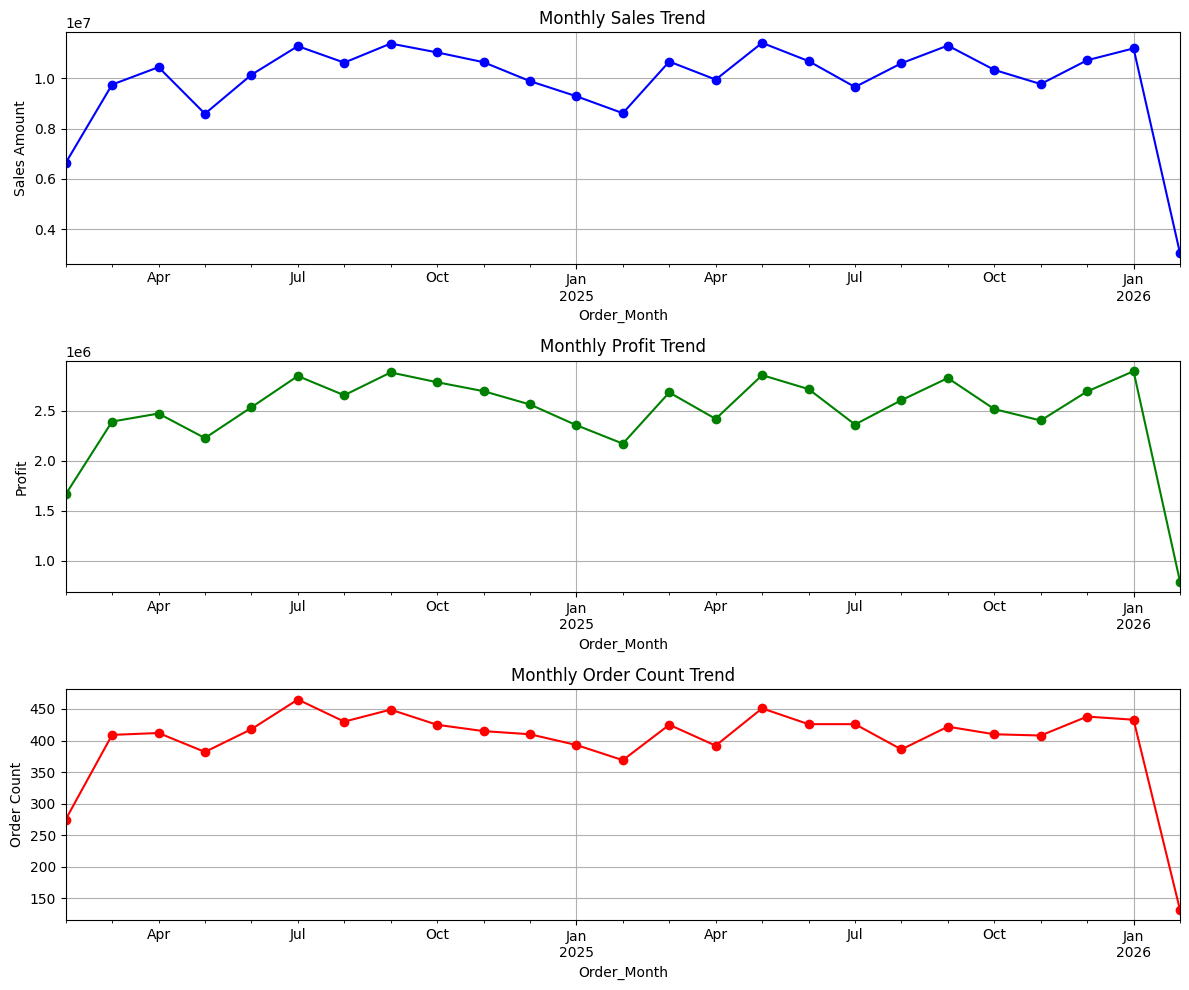

In [79]:
print(f'Time Series Analysis \n')

# Extract time components
df['Order_Month'] = df['Order_Date'].dt.to_period('M')
df['Order_year'] = df['Order_Date'].dt.year

monthly_trends = df.groupby('Order_Month').agg({'Sales_Amount' :'sum','Profit':'sum','Order_Id' : 'count'}).rename(columns={'Order_Id' : 'Order_Count'}) 
print(monthly_trends)

plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1)
monthly_trends['Sales_Amount'].plot(kind='line', color='blue', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales Amount')
plt.grid(True)

plt.subplot(3, 1, 2)
monthly_trends['Profit'].plot(kind='line', color='green', marker='o')
plt.title('Monthly Profit Trend')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(3, 1, 3)
monthly_trends['Order_Count'].plot(kind='line', color='red', marker='o')
plt.title('Monthly Order Count Trend')
plt.ylabel('Order Count')
plt.grid(True)

plt.tight_layout()
plt.show()



### Advanced Analysis-

Correlation Analysis 

                   Quantity  Unit_Price  Discount (%)  Sales_Amount  \
Quantity           1.000000    0.001507      0.012582      0.624906   
Unit_Price         0.001507    1.000000      0.000013      0.680118   
Discount (%)       0.012582    0.000013      1.000000     -0.121954   
Sales_Amount       0.624906    0.680118     -0.121954      1.000000   
Cost_Price         0.613303    0.668842     -0.123776      0.983691   
Profit             0.550662    0.595677     -0.096471      0.875117   
Stock_left        -0.004281    0.003614      0.008665     -0.003363   
Recorder_Quantity -0.005983   -0.002065     -0.007658     -0.001258   

                   Cost_Price    Profit  Stock_left  Recorder_Quantity  
Quantity             0.613303  0.550662   -0.004281          -0.005983  
Unit_Price           0.668842  0.595677    0.003614          -0.002065  
Discount (%)        -0.123776 -0.096471    0.008665          -0.007658  
Sales_Amount         0.983691  0.875117   -0.

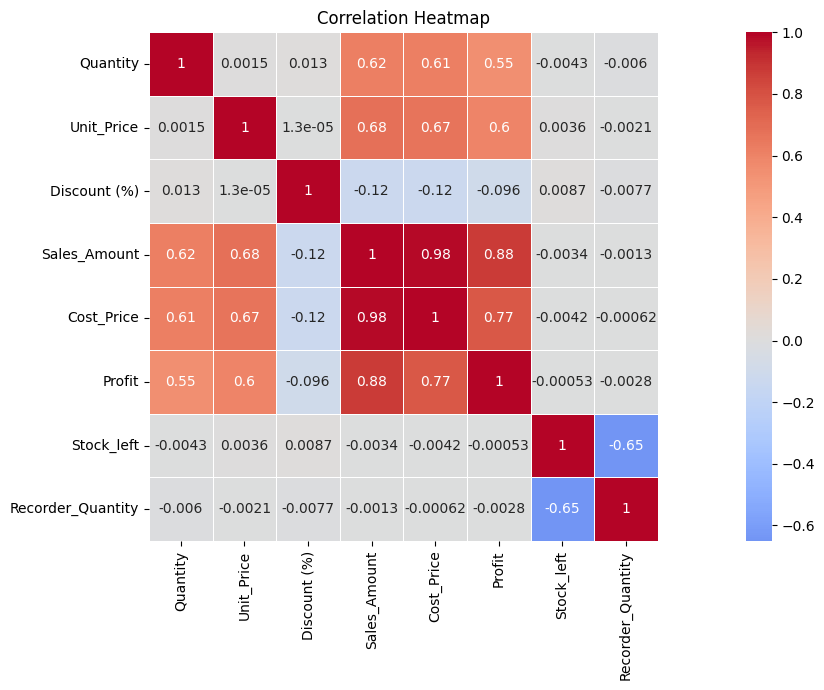

In [84]:
print(f'Correlation Analysis \n')

# select numerical columns
numeric_df = df[['Quantity','Unit_Price','Discount (%)','Sales_Amount','Cost_Price','Profit','Stock_left','Recorder_Quantity']]

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

plt.figure(figsize=(18,7))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,square=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Customer Segment Analysis-

Segment Analysis 

                  Total Sales  Avg Sales  Total Profit  Avg Profit  \
Customer_Segment                                                     
Consumer           82865026.7   24581.73   20987817.00     6225.99   
Corporate          83265548.4   25004.67   20787928.29     6242.62   
Home Office        81587482.7   24723.48   20182405.53     6115.88   

                  Order Count  Avg Discount  
Customer_Segment                             
Consumer                 3371         11.78  
Corporate                3330         12.13  
Home Office              3300         12.14   



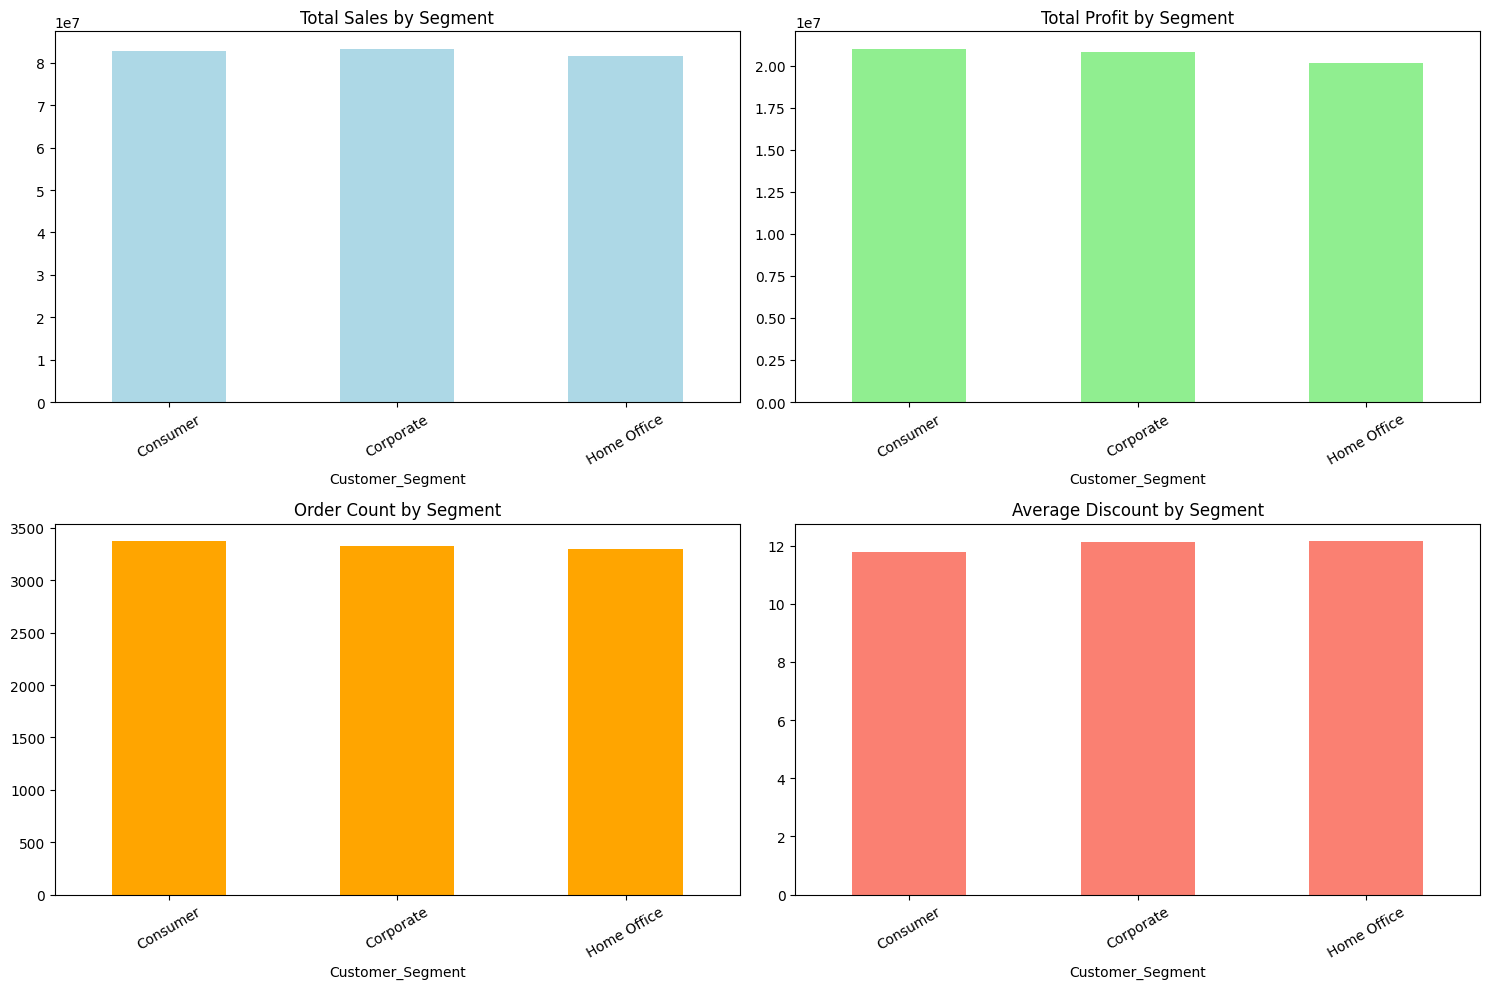

In [99]:
print(f'Segment Analysis \n')

segment_analysis = df.groupby('Customer_Segment').agg({
    'Sales_Amount' : ['sum','mean'],
    'Profit' : ['sum','mean'],
    'Order_Id' : 'count',
    'Discount (%)' : 'mean'
}).round(2)

segment_analysis.columns= ['Total Sales','Avg Sales','Total Profit','Avg Profit','Order Count','Avg Discount']
print(segment_analysis,'\n')


# Visualizations-
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Total Sales
segment_analysis['Total Sales'].plot(
    kind='bar',
    ax=axes[0,0],
    color='lightblue'
)
axes[0,0].set_title('Total Sales by Segment')
axes[0,0].tick_params(axis='x', rotation=30)

# Total Profit
segment_analysis['Total Profit'].plot(
    kind='bar',
    ax=axes[0,1],
    color='lightgreen'
)
axes[0,1].set_title('Total Profit by Segment')
axes[0,1].tick_params(axis='x', rotation=30)

# Order Count 
segment_analysis['Order Count'].plot(
    kind='bar',
    ax=axes[1,0],
    color='orange'
)
axes[1,0].set_title('Order Count by Segment')
axes[1,0].tick_params(axis='x', rotation=30)

# Average Discount 
segment_analysis['Avg Discount'].plot(
    kind='bar',
    ax=axes[1,1],
    color='salmon'
)
axes[1,1].set_title('Average Discount by Segment')
axes[1,1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


## Key Insights:

In [102]:
# Overall Metrics-
Total_sales = df['Sales_Amount'].sum()
Total_profit = df['Profit'].sum()
Total_orders = df['Order_Id'].nunique()
Avg_profit_margin = Total_profit / Total_sales *100

print(f'Overall Performance \n')
print(f'Total Sales : $ {Total_sales:,.2f}')
print(f'Total Profit : $ {Total_profit:,.2f}')
print(f'Total Orders : {Total_orders:,.2f}')
print(f'Average Profit Margin : {Avg_profit_margin:,.2f}%')

Overall Performance 

Total Sales : $ 247,718,057.80
Total Profit : $ 61,958,150.82
Total Orders : 10,001.00
Average Profit Margin : 25.01%


In [107]:
# Top performing Category-
top_categories = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(f'Top performing Category with Profit : {top_categories}')

Top performing Category with Profit : Category
electronics      16004201.53
furniture        15706779.49
grocery          15559744.67
office supply    14687425.13
Name: Profit, dtype: float64


In [108]:
# Region Performance-
best_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
best_region = df.groupby('Region')['Profit'].sum().idxmax()
print(f'Best Regional Performance with Profit : {best_region}')

Best Regional Performance with Profit : East


In [110]:
# Delivery Performance-
delivery_stats = df['Delivery_Status'].value_counts(normalize=True)*100
print(f'Delivery Staus :  {delivery_stats}')

Delivery Staus :  Delivery_Status
Cancelled    25.687431
Delivered    25.297470
Returned     24.707529
Pending      24.307569
Name: proportion, dtype: float64


In [111]:
# Customer Segments-

best_segment = df.groupby('Customer_Segment')['Profit'].sum().idxmax()
print(f'Top Segment : {best_segment}')

Top Segment : Consumer
